# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby("type").count()["ride_id"]

In [6]:
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby("type").sum()["driver_count"]

In [8]:
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [9]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby("type").sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [10]:
#  4. Get the average fare per ride for each city type. 
per_ride_avg_fares = pyber_data_df.groupby("type").mean()["fare"]
per_ride_avg_fares

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [11]:
# 5. Get the average fare per driver for each city type. 
per_driver_avg_fares = pyber_data_df.groupby("type").sum()["fare"]/city_data_df.groupby("type").sum()["driver_count"]


In [12]:
per_driver_avg_fares

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [13]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides": total_rides,"Total Drivers": total_drivers,
                                 "Total Fares": total_fares, 
                                 "Average Fare Per Ride": per_ride_avg_fares,
                                 "Average Fare Per Driver": per_driver_avg_fares})

In [14]:
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [15]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [16]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map("${:.2f}".format)

In [17]:
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [28]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [37]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_of_fares_df = pyber_data_df.groupby(["type","date"]).count()[["fare"]]

In [39]:
sum_of_fares_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,1
1,Rural,2019-01-02 11:18:32,1
2,Rural,2019-01-03 19:51:01,1
3,Rural,2019-01-04 03:31:26,1
4,Rural,2019-01-06 07:38:40,1
...,...,...,...
2370,Urban,2019-05-08 04:20:00,1
2371,Urban,2019-05-08 04:39:49,1
2372,Urban,2019-05-08 07:29:01,1
2373,Urban,2019-05-08 11:38:35,1


In [41]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_of_fares_df = sum_of_fares_df.reset_index()

In [42]:
sum_of_fares_df

,index,type,date,fare
0,0,Rural,2019-01-01 09:45:36,1
1,1,Rural,2019-01-02 11:18:32,1
2,2,Rural,2019-01-03 19:51:01,1
3,3,Rural,2019-01-04 03:31:26,1
4,4,Rural,2019-01-06 07:38:40,1
...,...,...,...,...
2370,2370,Urban,2019-05-08 04:20:00,1
2371,2371,Urban,2019-05-08 04:39:49,1
2372,2372,Urban,2019-05-08 07:29:01,1
2373,2373,Urban,2019-05-08 11:38:35,1


In [43]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_sum_fares_pivot = sum_of_fares_df.pivot(index = "date", columns = "type", values = "fare")
pyber_sum_fares_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,1.0
2019-01-01 00:46:46,NaN,1.0,NaN
2019-01-01 02:07:24,NaN,1.0,NaN
2019-01-01 03:46:50,NaN,NaN,1.0
2019-01-01 05:23:21,NaN,NaN,1.0
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,1.0
2019-05-08 04:39:49,NaN,NaN,1.0
2019-05-08 07:29:01,NaN,NaN,1.0


In [45]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_fares_Jan_April = pyber_sum_fares_pivot.loc['2019-01-01':'2019-04-29']

In [46]:
pyber_fares_Jan_April

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,1.0
2019-01-01 00:46:46,NaN,1.0,NaN
2019-01-01 02:07:24,NaN,1.0,NaN
2019-01-01 03:46:50,NaN,NaN,1.0
2019-01-01 05:23:21,NaN,NaN,1.0
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,1.0
2019-04-28 16:29:16,NaN,NaN,1.0
2019-04-28 17:26:52,NaN,NaN,1.0


In [52]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_fares_Jan_April.index = pd.to_datetime(pyber_fares_Jan_April.index)


In [51]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_fares_Jan_April.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [53]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_pyber_fares_df = pyber_fares_Jan_April.resample('W').count()

In [54]:
weekly_pyber_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,5,22,66
2019-01-13,3,35,80
2019-01-20,8,41,84
2019-01-27,6,34,84
2019-02-03,9,32,88
2019-02-10,4,31,94
2019-02-17,3,34,86
2019-02-24,11,43,103
2019-03-03,5,30,88


<AxesSubplot:xlabel='date'>

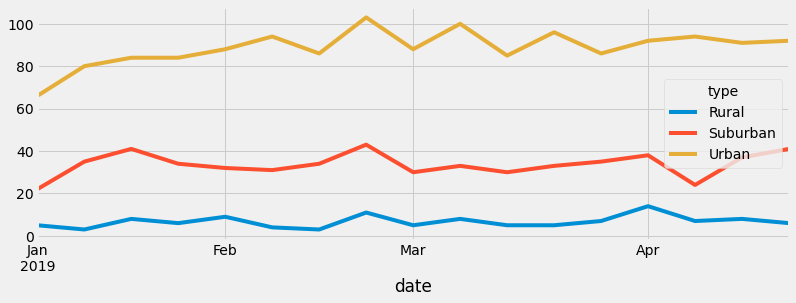

In [65]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

weekly_pyber_fares_df.plot(figsize = (12,4))